# Libraries Import

In [36]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Preparation: Channel and Encoder/Decoder Setup

In [37]:
# --- Hamming Code ---
# Hamming (7,4) codewords
Hamming_words = [
    '0000000', '1000110', '0100101', '0010011',
    '0001111', '1100011', '1010101', '1001001',
    '0110110', '0101010', '0011100', '1110000',
    '1101100', '1011010', '0111001', '1111111'
]

# Hamming distance between two binary strings
def hamming_distance(a, b):
    return sum(x != y for x, y in zip(a, b))


# Bitwise complement of a binary string
def bitwise_complement(word):
    return ''.join('1' if b == '0' else '0' for b in word)

# Generate all 3-bit messages
def generate_messages():
    return [format(i, '03b') for i in range(8)]

# Generate all 7-bit binary strings (used for Task 1)
def generate_all_7bit_words():
    return [format(i, '07b') for i in range(128)]

# --- Encoder --- for task 2
# Get bin: codeword with prefix 0+u and its complement
def get_bin(u):
    prefix = '0' + u
    for word in Hamming_words:
        if word.startswith(prefix):
            return [word, bitwise_complement(word)]
    return []

# Random binning encoder
def random_binning_encoder(u):
    return random.choice(get_bin(u))

# --- Channels ---
# Eavesdropper channel (flips up to 3 bits)
def eavesdropper_channel(x):
    x = list(x)
    for i in random.sample(range(7), random.randint(0, 3)):
        x[i] = '1' if x[i] == '0' else '0'
    return ''.join(x)

# Legitimate channel (flips 1 bit)
def legitimate_channel(x):
    x = list(x)
    i = random.randint(0, 6)
    x[i] = '1' if x[i] == '0' else '0'
    return ''.join(x)

# --- Decoder --- for task 3
# Decoder function
def decode(y):
    closest = min(Hamming_words, key=lambda w: hamming_distance(y, w))
    if closest[0] == '0':
        return closest[1:4]
    else:
        return bitwise_complement(closest[1:4])

# Task 1

Simulate Uniform Error Wiretap Channel


--- Task 1: Simulate Uniform Error Wiretap Channel ---
Estimated mutual information I(Y; Z | X = 1001000) = 0.034501 bits


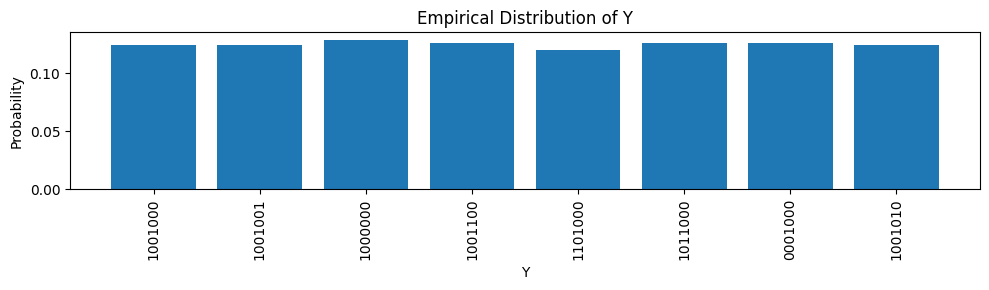

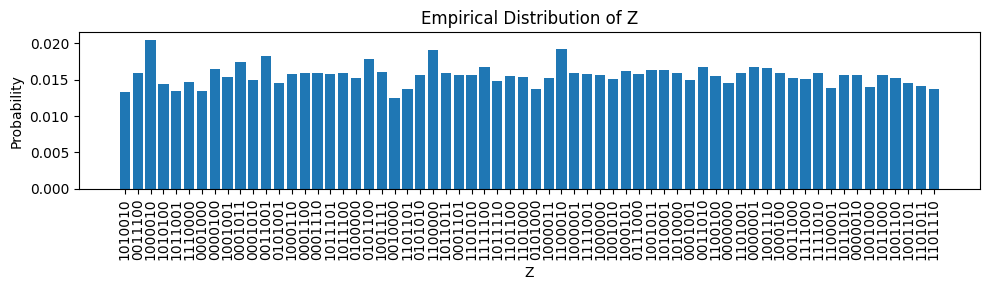

In [38]:
def task1(x='1001000', trials=10000):
    print("\Simulate Uniform Error Wiretap Channel")
    y_samples = []
    z_samples = []

    # Generate sets of outputs within allowed Hamming distances
    def Ty_given_x(a):
        return [b for b in generate_all_7bit_words() if hamming_distance(a, b) <= 1]

    def Tz_given_x(a):
        return [c for c in generate_all_7bit_words() if hamming_distance(a, c) <= 3]

    Ty = Ty_given_x(x)
    Tz = Tz_given_x(x)

    # Sample from conditional distributions
    for _ in range(trials):
        y = random.choice(Ty)
        z = random.choice(Tz)
        y_samples.append(y)
        z_samples.append(z)

    # Empirical mutual information I(Y;Z|X)
    joint_counts = Counter(zip(y_samples, z_samples))
    y_counts = Counter(y_samples)
    z_counts = Counter(z_samples)

    mi = 0.0
    for (y, z), count in joint_counts.items():
        p_yz = count / trials
        p_y = y_counts[y] / trials
        p_z = z_counts[z] / trials
        mi += p_yz * np.log2(p_yz / (p_y * p_z))

    print(f"Estimated mutual information I(Y; Z | X = {x}) = {mi:.6f} bits")

    # Plot distribution
    def plot_bar(counter, label):
        probs = {k: v / trials for k, v in counter.items()}
        plt.figure(figsize=(10, 3))
        plt.bar(range(len(probs)), list(probs.values()))
        plt.title(f"Empirical Distribution of {label}")
        plt.xlabel(label)
        plt.ylabel("Probability")
        plt.xticks(range(len(probs)), list(probs.keys()), rotation=90)
        plt.tight_layout()
        plt.show()

    plot_bar(y_counts, "Y")
    plot_bar(z_counts, "Z")

task1()

# Task 2

Random binding encoder

In [39]:
def task2():
    for u in generate_messages():
        x = random_binning_encoder(u)
        print(f"u = {u} then x = {x}")

task2()

u = 000 then x = 1111111
u = 001 then x = 1110000
u = 010 then x = 0010011
u = 011 then x = 0011100
u = 100 then x = 0100101
u = 101 then x = 1010101
u = 110 then x = 0110110
u = 111 then x = 1000110


# Task 3

DECODING

In [40]:
def task3():
    print("Test without noise:")
    for u in generate_messages():
        x = random_binning_encoder(u)
        u_hat = decode(x)
        print(f"u = {u} then x = {x} |after| u_hat = {u_hat} {'OK' if u == u_hat else 'FAIL'}")

    print("\nTest with 1-bit error:")
    for u in generate_messages():
        x = random_binning_encoder(u)
        y = legitimate_channel(x)
        u_hat = decode(y)
        print(f"u = {u} then x = {x} |after| y = {y} |and again| u_hat = {u_hat} {'OK' if u == u_hat else 'FAIL'}")

task3()

Test without noise:
u = 000 then x = 0000000 |after| u_hat = 000 OK
u = 001 then x = 0001111 |after| u_hat = 001 OK
u = 010 then x = 1101100 |after| u_hat = 010 OK
u = 011 then x = 1100011 |after| u_hat = 011 OK
u = 100 then x = 0100101 |after| u_hat = 100 OK
u = 101 then x = 1010101 |after| u_hat = 101 OK
u = 110 then x = 1001001 |after| u_hat = 110 OK
u = 111 then x = 0111001 |after| u_hat = 111 OK

Test with 1-bit error:
u = 000 then x = 0000000 |after| y = 0010000 |and again| u_hat = 000 OK
u = 001 then x = 1110000 |after| y = 1110100 |and again| u_hat = 001 OK
u = 010 then x = 1101100 |after| y = 1001100 |and again| u_hat = 010 OK
u = 011 then x = 1100011 |after| y = 1100001 |and again| u_hat = 011 OK
u = 100 then x = 1011010 |after| y = 1011011 |and again| u_hat = 100 OK
u = 101 then x = 0101010 |after| y = 0001010 |and again| u_hat = 101 OK
u = 110 then x = 0110110 |after| y = 0010110 |and again| u_hat = 110 OK
u = 111 then x = 1000110 |after| y = 1000010 |and again| u_hat = 111

# Task 4

Verify perfect secrecy

(spoiler: it's far from perfect)

In [41]:
def task4():
    joint = Counter()
    total = 0
    for u in generate_messages():
        for _ in range(10000):
            x = random_binning_encoder(u)
            z = eavesdropper_channel(x)
            joint[(u, z)] += 1
            total += 1

# Compute empirical p(u), p(z), and p(u,z)
    p_u = {u: 1/8 for u in generate_messages()}
    p_z = {}
    for (_, z) in joint:
        p_z[z] = sum(joint[(u, z)] for u in generate_messages()) / total

# Estimate mutual information I(U;Z)
    mi = 0
    for (u, z), count in joint.items():
        p_uz = count / total
        mi += p_uz * np.log2(p_uz / (p_u[u] * p_z[z]))

    print(f"I(U;Z) = {mi:.6f} bits")

task4()

I(U;Z) = 0.768051 bits


# Task 5

Simulating the wiretap BSC channel

In [42]:
class BSC:
    def __init__(self, epsilon=0.0, delta=0.0):
        self.epsilon = epsilon  # Error rate for Bob (legitimate)
        self.delta = delta      # Error rate for Eve (eavesdropper)

    def flip_bits(self, x, error_rate):
        # flips each bit in x with probability error_rate
        return ''.join(
            bit if random.random() > error_rate else ('0' if bit == '1' else '1')
            for bit in x
        )

    def transmit(self, x):
        y = self.flip_bits(x, self.epsilon)  # received by Bob
        z = self.flip_bits(x, self.delta)    # received by Eve
        return y, z

def task5(epsilon=0.1, delta=0.3, trials=1000):
    print(f"Parameters: epsilon (Bob's error) = {epsilon}, delta (Eve's error) = {delta}")

    channel = BSC(epsilon, delta)
    bit_errors_bob = 0
    bit_errors_eve = 0

    for _ in range(trials):
        u = random.choice(generate_messages())  # choose a random 3-bit message
        x = random_binning_encoder(u)           # encode it using binning
        y, z = channel.transmit(x)              # transmit through the BSC

        bit_errors_bob += hamming_distance(x, y)
        bit_errors_eve += hamming_distance(x, z)

    print(f"Average bit errors (Bob): {bit_errors_bob / trials:.3f}")
    print(f"Average bit errors (Eve): {bit_errors_eve / trials:.3f}")

task5()

Parameters: epsilon (Bob's error) = 0.1, delta (Eve's error) = 0.3
Average bit errors (Bob): 0.704
Average bit errors (Eve): 2.127
